<a href="https://colab.research.google.com/github/nandhukumar86/mykagglesubmissions/blob/master/house_prices_advanced_regression_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install kaggle
! pip install -q kaggle

# upload file to Colab
from google.colab import files
files.upload()

# create kaggle folder in root and copy the file.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# provide permissions
! chmod 600 ~/.kaggle/kaggle.json

# download competition files by providing competition name
! kaggle competitions download -c 'house-prices-advanced-regression-techniques'

# unzip the files and folders
#! unzip train.csv.zip -d train
#! unzip test.csv.zip -d test


Saving kaggle.json to kaggle.json
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 24.7MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 60.8MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 22.3MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 105MB/s]


#Basic Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


# Load Data

In [5]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [7]:
df_train.columns, df_test.columns

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

# Removing Id columns.

In [8]:
y_id = df_test.pop('Id')

In [9]:
df_train.drop(columns= ['Id'], inplace=True)

In [10]:
y_train = df_train.pop('SalePrice')

In [12]:
all(df_train.columns == df_test.columns)

True

In [13]:
X_features = df_train.columns

In [14]:
X_train = df_train.copy(deep = True)
X_test = df_test.copy(deep = True)

In [15]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [16]:
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [17]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [21]:
categorical_columns = X_train.describe(include = ['O']).columns
numerical_columns = X_train.describe().columns

In [26]:
categorical_columns.size + numerical_columns.size == X_features.size

True

## Removing highly correlated features

In [27]:
corr_matrix = X_train[numerical_columns].corr()
            
upper = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
high_correlation_features = [column for column in upper.columns if any(upper[column] > 0.8)]


In [28]:
high_correlation_features

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [30]:
X_train.drop(columns= high_correlation_features, inplace=True)
X_test.drop(columns= high_correlation_features, inplace=True)

In [31]:
X_features = X_train.columns

In [36]:
numerical_columns = numerical_columns.drop(high_correlation_features)

In [37]:
numerical_columns.size + categorical_columns.size == X_features.size

True

# Exploratory Data Analysis

Checking for columns more than 50% null

In [52]:
temp1 = pd.DataFrame(X_train.isnull().sum())
temp1.columns = ['Count']


In [53]:
temp1.query('Count > 1000') #approximately more than 50% of test data

,Count
Alley,1369
PoolQC,1453
Fence,1179
MiscFeature,1406


The above columns has more null values and it does not store good amount of data to train the model. Hence Dropping these columns.

In [55]:
high_na_featues = temp1.query('Count > 1000').index

In [57]:
high_na_featues

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [58]:
X_train.drop(columns= high_na_featues, inplace=True)
X_test.drop(columns= high_na_featues, inplace=True)

In [59]:
categorical_columns = X_train.describe(include = ['O']).columns
numerical_columns = X_train.describe().columns

In [61]:
X_train.columns.size, X_test.columns.size

(71, 71)

In [62]:
categorical_columns.size +  numerical_columns.size

71

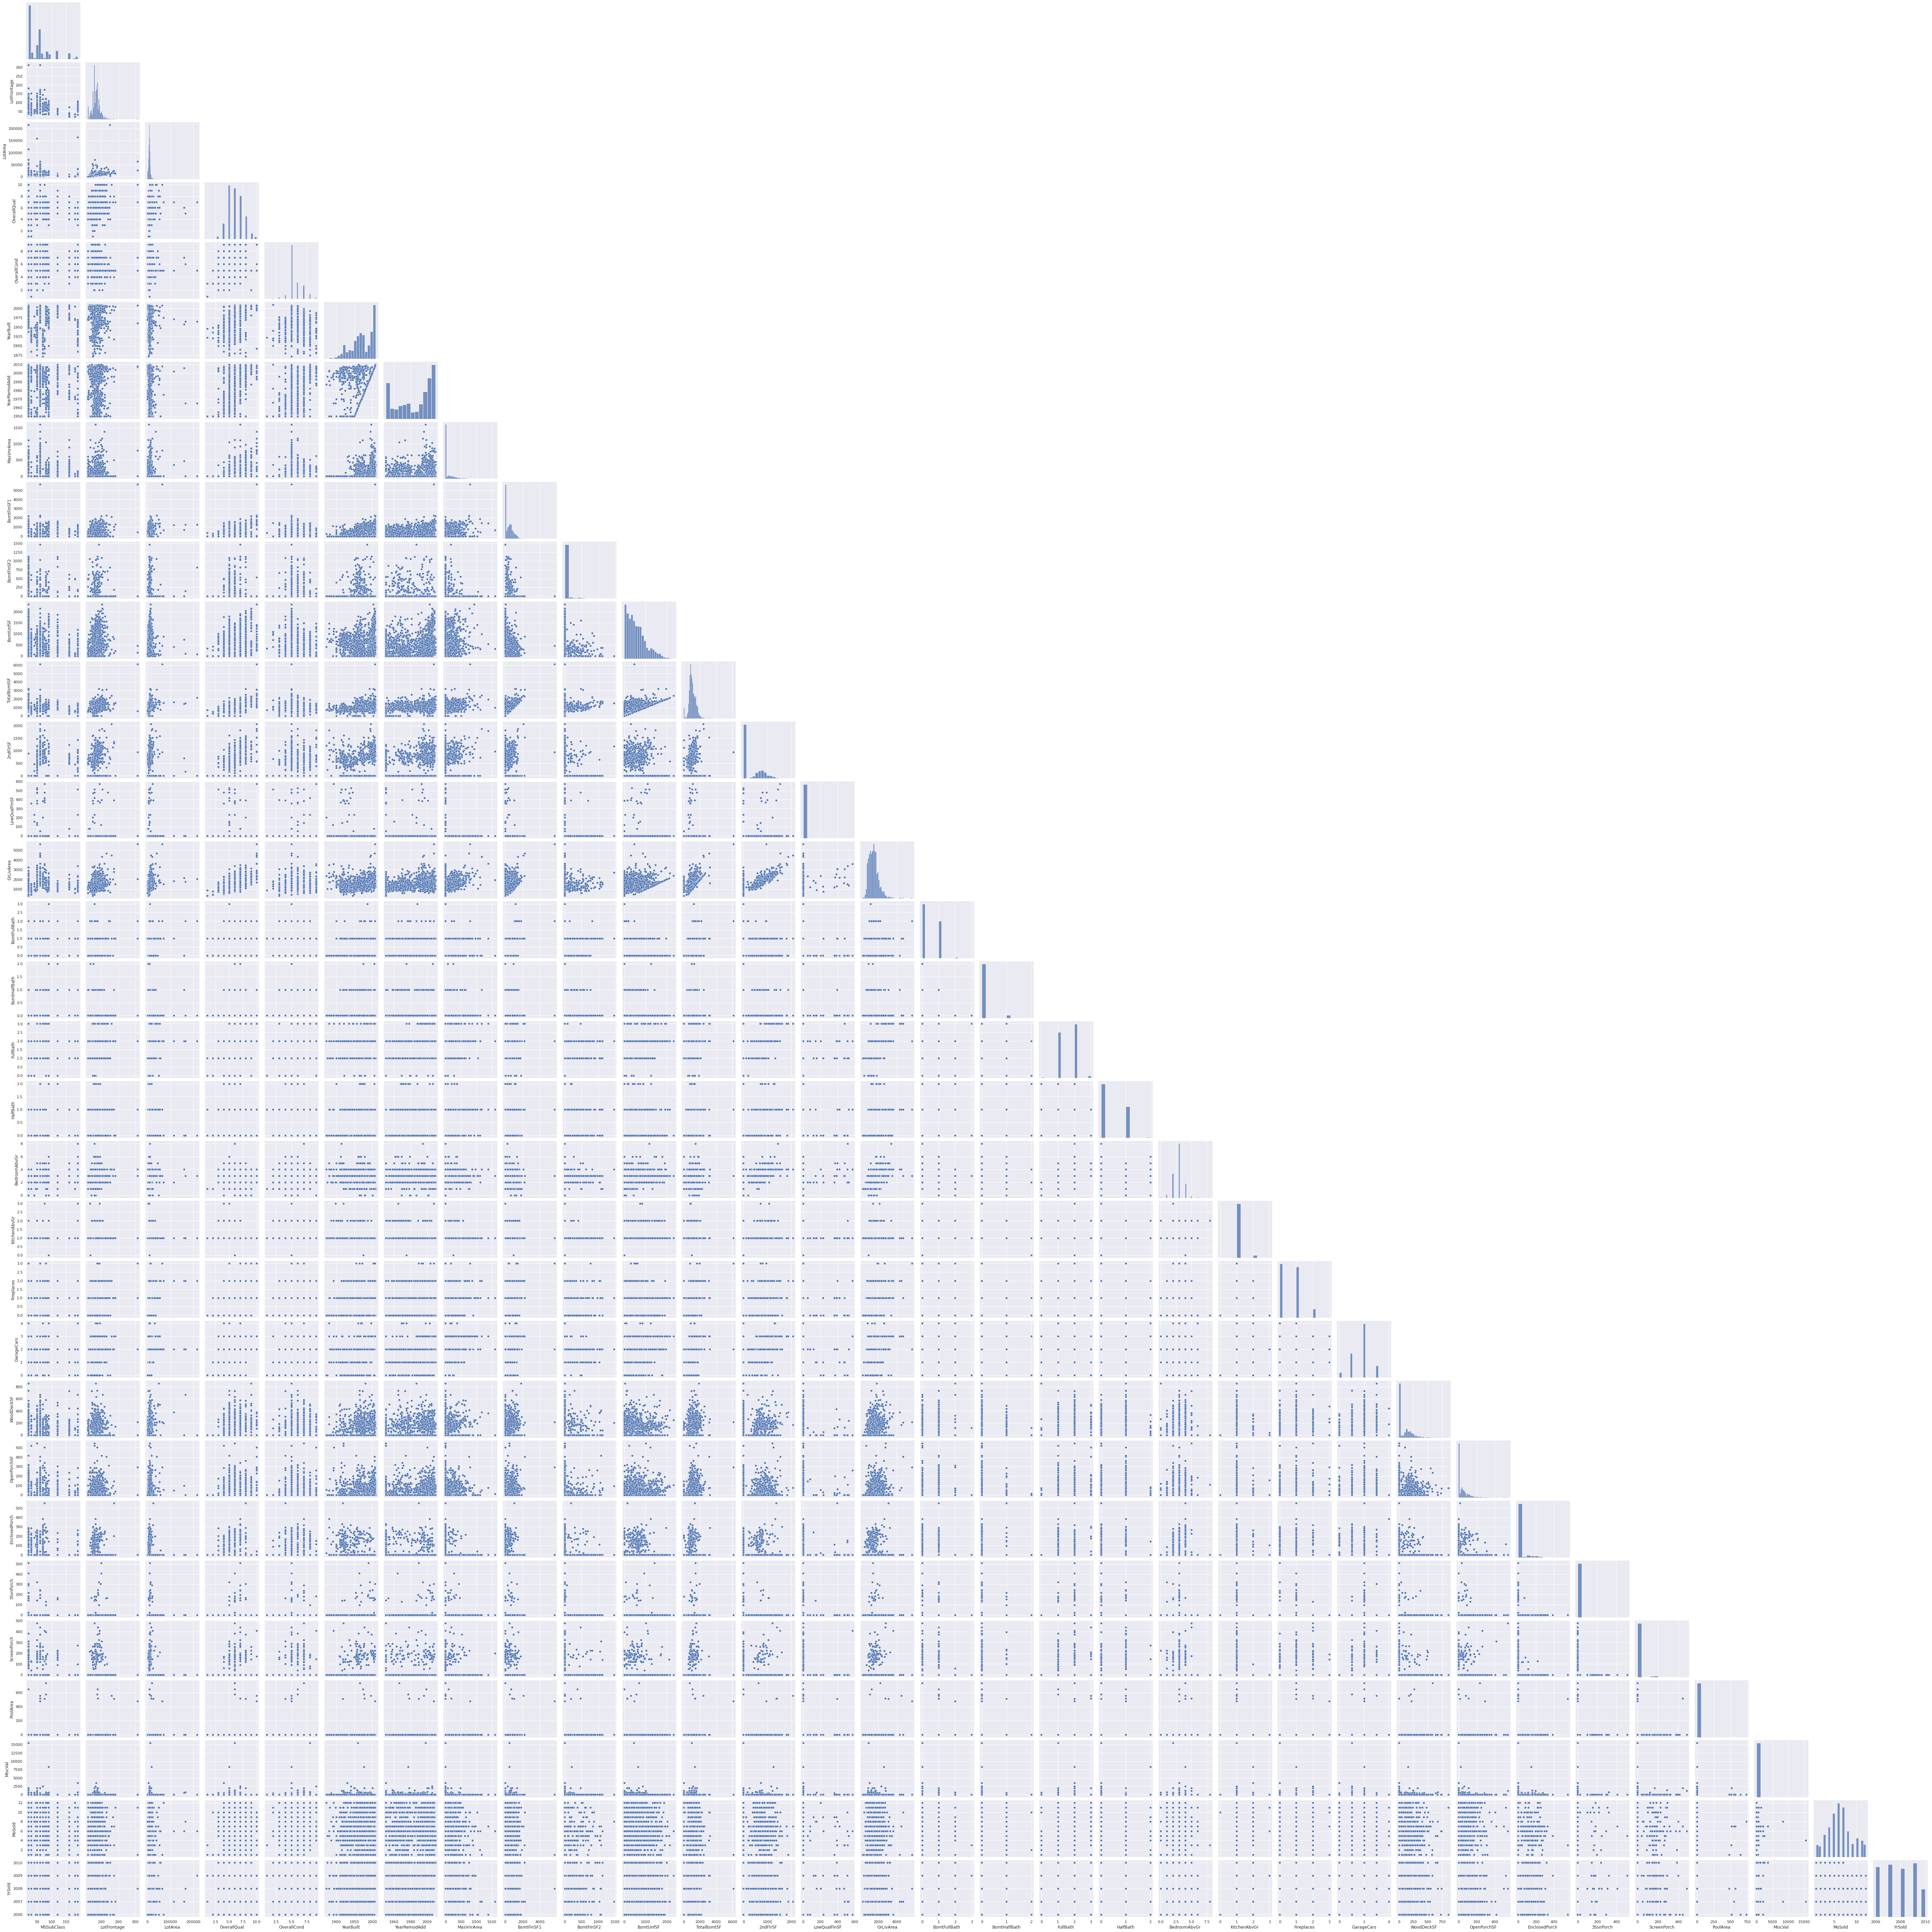

In [65]:
sns.pairplot(X_train[numerical_columns], corner=True)

In [79]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


pl_n = Pipeline([
                 ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                 ('std', StandardScaler())
])

pl_c = Pipeline([
                 ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                 ('std', OneHotEncoder(handle_unknown='ignore'))
])

In [93]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
                        ('num', pl_n, numerical_columns),
                        ('cat', pl_c, categorical_columns)
])

# Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression

pl = Pipeline([
               ('ct', ct),
               ('md', LinearRegression())
])

space = dict()
space['md__fit_intercept'] = [True, False]
space['md__normalize'] = [True, False]

model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train)

print('Linear Regression')

print('Training Score: ', model.score(X_train, y_train))
print('Validation Score:', model.best_score_)

# print(model)


Linear Regression
Training Score:  0.9303100521797113
Validation Score: 0.818873604676346


# Ridge Regression

In [109]:
from sklearn.linear_model import Ridge

pl = Pipeline([
               ('ct', ct),
               ('lr', Ridge())
])

space = dict()
space['lr__fit_intercept'] = [True, False]
space['lr__normalize'] = [True, False]
space['lr__alpha'] = np.linspace(0.01, 1,10)

model = RandomizedSearchCV(pl, param_distributions = space, cv = 5)

model.fit(X_train, y_train)

print('Ridge Regression')

print('Training Score: ', model.score(X_train, y_train))
print('Validation Score:', model.best_score_)


Ridge Regression
Training Score:  0.9240477754035289
Validation Score: 0.8403127042427482


# Lasso Regression

In [115]:
from sklearn.linear_model import Lasso

pl = Pipeline([
               ('ct', ct),
               ('lr', Lasso(max_iter=2000))
])

space = dict()
space['lr__fit_intercept'] = [True, False]
space['lr__normalize'] = [True, False]
# space['lr__alpha'] = [0.75, 1]

model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train)

print('Lasso Regression')

print('Training Score: ', model.score(X_train, y_train))
print('Validation Score:', model.best_score_)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119289549142.79553, tolerance: 4573746343.1931
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151172124737.5695, tolerance: 4530250643.568601
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110889728923.1123, tolerance: 4483661861.8728
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converg

Lasso Regression
Training Score:  0.9301446086413722
Validation Score: 0.8251176382555029


# Elastic Net

In [117]:
from sklearn.linear_model import ElasticNet

pl = Pipeline([
               ('ct', ct),
               ('lr', ElasticNet())
])

space = dict()
space['lr__fit_intercept'] = [True, False]
space['lr__normalize'] = [True, False]
space['lr__alpha'] = [0.25,0.5,0.75,1]

model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train)

print('ElasticNet Regression')

print('Training Score: ', model.score(X_train, y_train))
print('Validation Score:', model.best_score_)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 815913186135.8264, tolerance: 4573746343.1931
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 750261934909.4318, tolerance: 4530250643.568601
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 745176963799.0756, tolerance: 4483661861.8728
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge

ElasticNet Regression
Training Score:  0.8598121492146941
Validation Score: 0.8327951925916729


Based on the above analysis, Ridge performs better.

In [140]:
from sklearn.linear_model import Ridge

pl = Pipeline([
               ('ct', ct),
               ('lr', Ridge())
])

space = dict()
space['lr__fit_intercept'] = [True, False]
space['lr__normalize'] = [True, False]
space['lr__alpha'] = np.linspace(0.01, 1,10)

model = RandomizedSearchCV(pl, param_distributions = space, cv = 5)

model.fit(X_train, np.log(y_train))

print('Ridge Regression')

print('Training Score: ', model.score(X_train, np.log(y_train)))
print('Validation Score:', model.best_score_)


Ridge Regression
Training Score:  0.9190090347874341
Validation Score: 0.8718059585849895


In [141]:
y_test_predict = np.exp(model.predict(X_test))
y_train_predict = np.exp(model.predict(X_train))


In [142]:
sampledata = pd.read_csv('/content/sample_submission.csv')

In [143]:
df = pd.concat([pd.DataFrame(y_id),pd.DataFrame(y_test_predict)], axis=1, ignore_index=True)
df.columns = ['Id','SalePrice']


In [144]:

df.to_csv('Submission.csv', index=False)
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f /content/Submission.csv -m "Ridge-Log-RandomSearch"

100% 33.7k/33.7k [00:09<00:00, 3.67kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques